# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [6]:
import pandas as pd
import glob as glob
import datetime as dt

#We only take care of confirmed deaths
'''The average number of new cases / deaths is computed by subtracting to the cumulative amount on the last
report of each month the same number recorded on the first report of the month. The number thus obtained is
then normalized as the daily average by diving by the number of days between the two reports.

The first step is to parse the csv files from the 3 different countries into a unique dataset. 
Afterwards, data cleaning takes place, which consists of merging the "date" and "Date" columns, 
'''


'Load csv data for one country'
def read_country(country):
    files = glob.glob(DATA_FOLDER + "/ebola/" + country + "/*.csv")
    df = pd.concat((pd.read_csv(file) for file in files))
    df['Country'] = country
    return df.fillna(0)

'Load csv data for all countries'
def read_countries():
    df = read_country("guinea_data")
    df = df.append(read_country("sl_data"))
    df = df.append(read_country("liberia_data"))
    return df

def data_cleaning(df):
    df['Date'].fillna(df['date'], inplace=True)
    df['Month'] = df['Date'].map(getMonth)
    df['Day'] = df['Date'].map(getDay)
    df['Description'].fillna(df['Variable'], inplace=True)
    df['Description'].fillna(df['variable'], inplace=True)
    df['Description'] = df['Description'].str.replace('\\n ', '')
    df['Totals'].fillna(df['National'], inplace=True)
    del df['Date']
    del df['date']
    del df['Variable']
    del df['variable']
    del df['National']
    
def getMonth(date):
    if ('/' in date):
        try :
            d = dt.datetime.strptime(date, "%m/%d/%Y")
        except ValueError:
            d = dt.datetime.strptime(date, "%m/%d/%y")
    else: d = dt.datetime.strptime(date, "%Y-%m-%d")
    return d.month

def getDay(date):
    if ('/' in date):
        try :
            d = dt.datetime.strptime(date, "%m/%d/%Y")
        except ValueError:
            d = dt.datetime.strptime(date, "%m/%d/%y")
    else: d = dt.datetime.strptime(date, "%Y-%m-%d")
    return d.day



def amount_on(month, day, desc):
    onDate = month[month['Day'] == day]
    amount = 0.0
    for d in desc:
        attr = onDate[onDate['Description'] == d]
        #print("Month ", month['Month'].iloc[0], ", Day", day, ":", attr[['Totals']], "desc:", d)
        amount += attr[['Totals']].iloc[0].astype(float)
    return amount

def month_avg(month, desc):
    last_day = month['Day'].max()
    first_day = month['Day'].min()
    tot = amount_on(month, last_day, desc) - amount_on(month, first_day, desc)
    return tot / (last_day - first_day)

def all_months_avgs(country, desc):
    return country.groupby(['Month']).apply(month_avg, desc)

def guinea_means(df):
    print("1. Guinea")
    guinea = df[df['Country'] == "guinea_data"]
    guinea = guinea[guinea['Month'] < 10]
    print("Average daily deaths per month")
    print(all_months_avgs(guinea, ["Total deaths (confirmed + probables + suspects)"]), "\n")
    print("Average daily new cases per month")
    print(all_months_avgs(guinea, ["Cumulative (confirmed + probable + suspects)"]), "\n")

def liberia_means(df):
    print("2. Liberia")
    lib = df[df['Country'] == "liberia_data"]
    lib = lib[lib['Month'] < 12]
    print("Average daily deaths per month")
    print(all_months_avgs(lib, ["Total death/s in confirmed, probable, suspected cases"]), "\n")
    print("Average daily new cases per month")
    print(all_months_avgs(lib, ["Total suspected cases", 
                                "Total probable cases", 
                                "Total confirmed cases"]), "\n")
    
def sierra_leone_means(df):
    print("3. Sierra Leone")
    sl = df[df['Country'] == "sl_data"]
    sl = sl[sl['Month'] < 12.0]
    print("Average daily deaths per month")
    print(all_months_avgs(sl, ["death_confirmed", 
                                "death_suspected", 
                                "death_probable"]), "\n")
    print("Average daily new cases per month")
    print(all_months_avgs(sl, ["cum_suspected", 
                                "cum_probable", 
                                "cum_confirmed"]), "\n")
        
df = read_countries()
data_cleaning(df)
guinea_means(df)
liberia_means(df)
sierra_leone_means(df)

1. Guinea
Average daily deaths per month
         Totals
Month          
8      4.666667
9      7.607143 

Average daily new cases per month
7         Totals
Month           
8       9.407407
9      13.535714 

2. Liberia
Average daily deaths per month
7         Totals
Month           
6       2.538462
7       3.360000
8      24.153846
9      36.344828
10     20.500000
11     16.321429 

Average daily new cases per month
26        Totals
Month           
6       5.230769
7       8.280000
8      42.730769
9      71.137931
10      8.566667
11     40.321429 

3. Sierra Leone
Average daily deaths per month
11        Totals
Month           
8       6.947368
9       5.310345
10     28.500000
11     15.000000 

Average daily new cases per month
6         Totals
Month           
8      20.526316
9      41.931034
10     71.033333
11     86.535714 



## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [67]:
import os
import glob as glob
import pandas as pd

def add_unique_index(df):
    df['Index'] = list(range(df.shape[0]))
    columns = df.columns.tolist()
    columns = columns[-1:] + columns[:-1]
    return df[columns]

def read_files():  
    files = glob.glob(DATA_FOLDER + "/microbiome/MID*.xls")
    df = pd.DataFrame()
    meta = pd.read_excel(DATA_FOLDER + "/microbiome/metadata.xls")
    i = 0
    for file in files:
        new = pd.read_excel(file, header=None)
        new['BARCODE'] = meta.iloc[i]['BARCODE']
        new['GROUP'] = meta.iloc[i]['GROUP']
        new['SAMPLE'] = meta.iloc[i]['SAMPLE']
        df = df.append(new)
        i += 1
    return add_unique_index(df).fillna("unknown")


read_files()

       

,Index,0,1,BARCODE,GROUP,SAMPLE
0,0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID1,EXTRACTION CONTROL,unknown
1,1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,unknown
2,2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,unknown
3,3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,unknown
4,4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,unknown
5,5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
6,6,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
7,7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
8,8,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
9,9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [68]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [69]:
# Part 1
import pandas as pd

df = pd.read_excel(DATA_FOLDER + "/titanic.xls")
print("Types:")
print(df.columns.to_series().groupby(df.dtypes).groups, "\n")
print("Value Ranges:")
lowest = df.describe().loc['min']
highest = df.describe().loc['max']
for i in range(lowest.shape[0]):
    print(lowest.index[i], "\t", lowest[i], "-", highest[i])

print("Categorical data: pclass, survived, sex, cabin, embarked, boat")
df['pclass'] = pd.Categorical(df['pclass'])
df['survived'] = pd.Categorical(df['survived'])
df['sex'] = pd.Categorical(df['sex'])
df['cabin'] = pd.Categorical(df['cabin'].fillna("Unknown"))
df['embarked'] = pd.Categorical(df['embarked'])
df['boat'] = pd.Categorical(df['boat'])

Types:
{dtype('int64'): Index(['pclass', 'survived', 'sibsp', 'parch'], dtype='object'), dtype('float64'): Index(['age', 'fare', 'body'], dtype='object'), dtype('O'): Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')} 

Value Ranges:
pclass 	 1.0 - 3.0
survived 	 0.0 - 1.0
age 	 0.1667 - 80.0
sibsp 	 0.0 - 8.0
parch 	 0.0 - 9.0
fare 	 0.0 - 512.3292
body 	 1.0 - 328.0
Categorical data: pclass, survived, sex, cabin, embarked, boat


Populating the interactive namespace from numpy and matplotlib


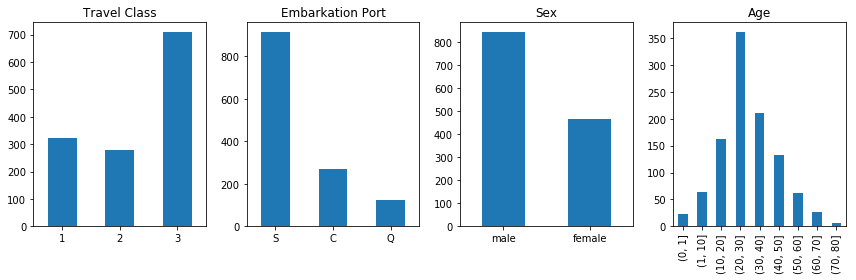

In [70]:
# Question 2
import matplotlib.pyplot as plt
%pylab inline

fig, axs = plt.subplots(1,4, figsize=(12,4))

df.pclass.value_counts(sort=False).plot(ax=axs[0], kind='bar', rot=0, title="Travel Class")
df.embarked.value_counts().plot(ax=axs[1], kind='bar', rot=0, title="Embarkation Port")
df.sex.value_counts().plot(ax=axs[2], kind='bar', title="Sex", rot=0)
pd.cut(df.age, [0,1,10,20,30,40,50,60,70,80]).value_counts(sort=False).plot(ax=axs[3], kind='bar', title="Age")
plt.tight_layout()

In [1]:
# Question 3
# The starting letter of the cabin is the floor. 
# Cabins with more than one letter such as "F G63" 
# are considered correct (Source: "https://www.encyclopedia-titanica.org/").

df['floor'] = df['cabin'].map(lambda x: x[0])
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes((0,0,.5,1))
p_per_floor = df.groupby(['floor']).size().drop("U")
p_per_floor.plot(kind='pie', ax=ax, title="Passengers per Floor",  autopct='%1.1f%%')


NameError: name 'df' is not defined

""


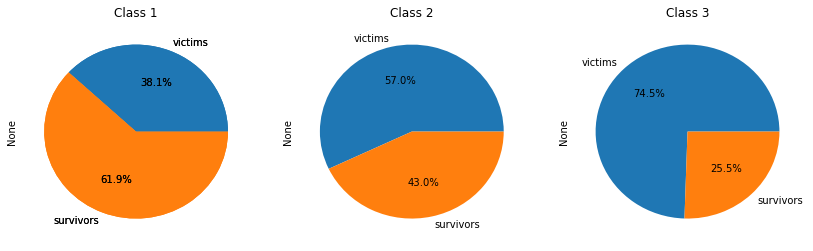

In [72]:
# Question 4
fig, axs = plt.subplots(1,3, figsize=(14,4))

def plot_class_surv(cls):
    icls = cls['pclass'].iloc[0]
    data = cls.groupby(['survived']).size()
    data.plot(kind='pie', ax=axs[icls - 1], labels=["victims", "survivors"],
              title=("Class " + str(icls)),  autopct='%1.1f%%')

df.groupby(['pclass']).apply(plot_class_surv)

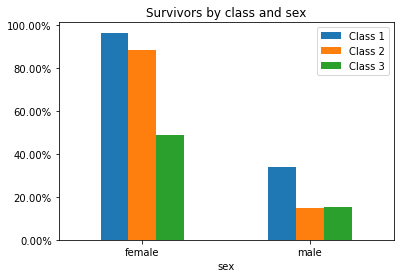

In [73]:
# Question 5
def class_by_sex(cls, data):
    passengers = cls.groupby(['sex']).size()
    survivors = cls[cls['survived'] == 1].groupby(['sex']).size()
    perc = survivors / passengers
    data["Class " + str(cls['pclass'].iloc[0])] = perc

data = pd.DataFrame(dtype=float)    
df.groupby(['pclass']).apply(class_by_sex, data)
ax = data.plot(kind="bar", rot=0, title="Survivors by class and sex")
vals = ax.get_yticks()
res = ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

In [74]:
# Question 6
def generate_result(data_yo, data_ma):
    tuples = [("young or old", "male"),
          ("young or old", "female"),
          ("middle-aged", "male"),
         ("middle-aged", "female")]
    sex = ['male', 'female']
    classes = ['Class 1', 'Class 2', 'Class 3']
    data = pd.DataFrame(dtype=float, index=pd.MultiIndex.from_tuples(tuples))
    for s in sex:
        for cls in classes:
            data.loc[('young or old', s), cls] = data_yo.loc[s, cls]  
    for s in sex:
        for cls in classes:
            data.loc[('middle-aged', s), cls] = data_ma.loc[s, cls]
    return add_unique_index(data)

data_yo = pd.DataFrame(dtype=float)
data_ma = pd.DataFrame(dtype=float)
yngs_and_olds = df[(df['age'] < 27) | (df['age'] > 57)]
middle_aged = df[(df['age'] >= 27) & (df['age'] <= 57)]
print("Size of youngs and olds: ", yngs_and_olds.shape[0])
print("Size of middle-aged: ", middle_aged.shape[0])
yngs_and_olds.groupby(['pclass']).apply(class_by_sex, data_yo)
middle_aged.groupby(['pclass']).apply(class_by_sex, data_ma)
generate_result(data_yo, data_ma)

Size of youngs and olds:  523
Size of middle-aged:  523


Index   Class 1   Class 2   Class 3
young or old male        0  0.333333  0.239437  0.183575
             female      1  0.942308  0.897959  0.529412
middle-aged  male        2  0.357798  0.068966  0.147887
             female      3  0.975309  0.888889  0.360000